# Rankine Cycle Progress Report
## CBE31358, Group R5
<hr>

## Verifying Saturation Data

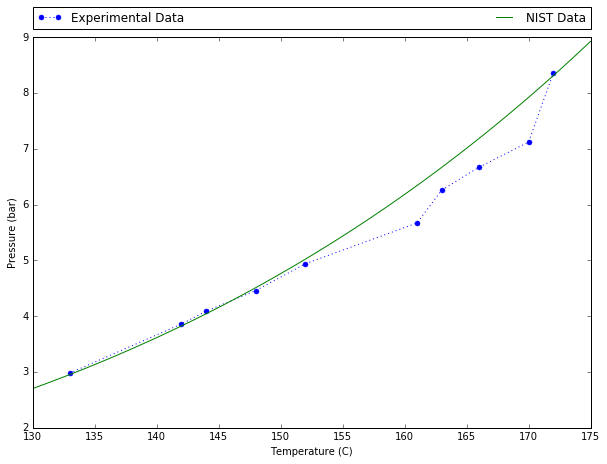

In [209]:
# experimental saturation data
Pexp = [2.98, 3.86, 4.09, 4.46, 4.94, 5.67, 6.26, 6.67, 7.12, 8.36]
Texp = [133,  142,  144,  148,  152,  161,  163,  166,  170,  172]

# saturation data from NIST
nist = np.genfromtxt('NISTdata.txt', skip_header=1)
nist = np.reshape(nist,[91,25])
nist = np.delete(nist,[range(2,25)],axis=1).T

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
exp, = plt.plot(Texp,Pexp,':.',markersize=10,label='Experimental Data')
nistP, = plt.plot(nist[0],nist[1],label='NIST Data')
plt.legend(handles=[exp,nistP],bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (bar)')

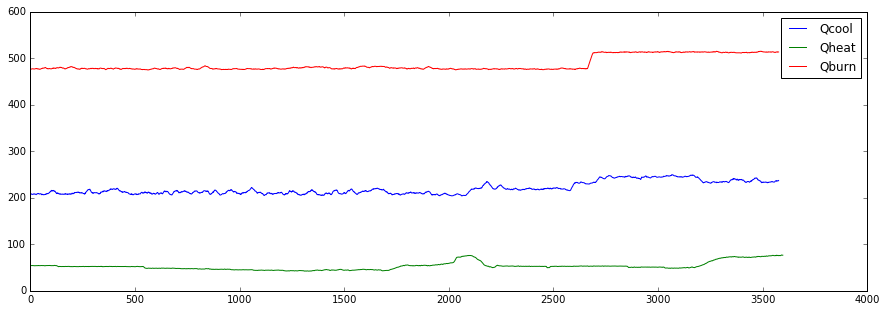

In [212]:
# import data from .txt files
import numpy as np
from numpy import convolve
data = np.genfromtxt("Data2.txt", skip_header = 6)
#data = np.append(data,np.genfromtxt("Data2.txt", skip_header = 6), axis=0)
#data = np.append(data,np.genfromtxt("Data3.txt", skip_header = 6), axis=0)

# delete irrelevant data
data = np.delete(data,[0,1,2,14],axis=1)
# flip, so data is chronological
data = np.flipud(data)

%matplotlib inline
import matplotlib.pyplot as plt

# Reorganize data
T1 = data[:,[0]]  # condenser temperature
T2 = data[:,[1]]  # cooling water inlet
T3 = data[:,[2]]  # cooling water outlet
T4 = data[:,[3]]  # feedwater to burner
T5 = data[:,[4]]  # superheater outlet
T6 = data[:,[5]]  # superheater inlet
F1 = data[:,[6]]  # feedwater flow (L/h)
F2 = data[:,[7]]  # cooling water flow (L/h)
F3 = data[:,[8]]  # gas flow (L/min)
P1 = data[:,[9]]  # superheater outlet pressure (bar)
P2 = data[:,[10]] # condenser pressure (bar)

HoC = 2220  # heat of combustion of propane (KJ/mol)

def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

R = 8.314e-2 # gas constant in (L*bar)/(K*mol)
n = (F3/(R*298))
Cw = 4.184

Qheat = ((T6-T4)*(F1/60))*Cw
Qheat = movingaverage(Qheat.T[0],5)
Qcool = ((T3-T2)*(F2/60))*Cw
Qcool = movingaverage(Qcool.T[0],25)
Qburn = n*HoC
Qburn = movingaverage(Qburn.T[0],25)

plt.figure(figsize=(15,5))
coolP, = plt.plot(Qcool,label='Qcool')
heatP, = plt.plot(Qheat,label='Qheat')
burnP, = plt.plot(Qburn,label='Qburn')
plt.legend(handles=[coolP, heatP, burnP])


## Attaining 100% Quality Steam

192.0
8.36
3.06


[0, 3600, 0, 1.1]

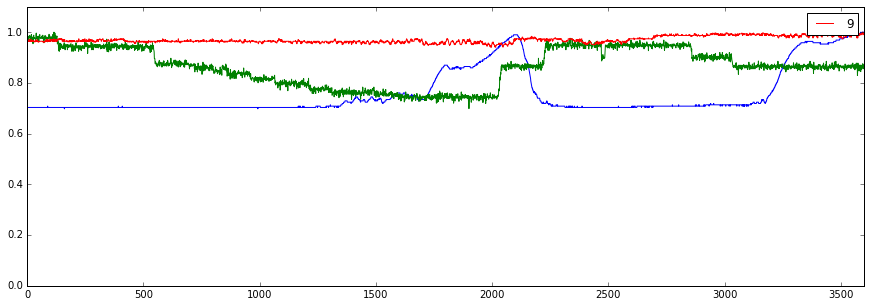

In [214]:
plt.figure(figsize=(15,5))

plotnumbs = [5,6]
for i in plotnumbs:
    x = movingaverage(data[:,[i]].T[0],1)
    print(np.amax(x))
    x = x/np.amax(x)
    x = plt.plot(x, label=str(i))
    plt.legend(x,str(i))
    

plt.axis([0,3600,0,1.1])

## Calculations